### Scenerio for Analysis

This dataset provides comprehensive insights into various organizations' financial performance and geographic distribution across different countries.
It includes attributes such as organizationName, country, revenue, profits, assets, and marketValue. Each entry contains detailed information about the organization's name, the country in which it operates, and its financial metrics, including revenue, profits, assets, and market value. Whether it's assessing revenue trends, comparing profits across countries, or analyzing market values, this dataset serves as a valuable resource for conducting comprehensive financial analyses and market research.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Preprocessing

In [4]:
df = pd.read_csv('Largest companies in world.csv') 

In [5]:
df.head()

,rank,organizationName,country,revenue,profits,assets,marketValue
0,1,JPMorgan Chase,United States,179.93 B,41.8 B,"3,744.3 B",399.59 B
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.47 B,156.36 B,660.99 B,"2,055.22 B"
2,3,ICBC,China,216.77 B,52.47 B,"6,116.82 B",203.01 B
3,4,China Construction Bank,China,203.08 B,48.25 B,"4,977.48 B",172.99 B
4,5,Agricultural Bank of China,China,186.14 B,37.92 B,"5,356.86 B",141.82 B


In [6]:
df.shape

(2051, 7)

In [7]:
df.isnull().sum()

rank                1
organizationName    1
country             1
revenue             2
profits             2
assets              2
marketValue         2
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

50

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rank              1999 non-null   object
 1   organizationName  1999 non-null   object
 2   country           1999 non-null   object
 3   revenue           1999 non-null   object
 4   profits           1999 non-null   object
 5   assets            1999 non-null   object
 6   marketValue       1999 non-null   object
dtypes: object(7)
memory usage: 124.9+ KB


In [13]:
df.describe(include='all')

,rank,organizationName,country,revenue,profits,assets,marketValue
count,1999,1999,1999,1999,1999,1999,1999
unique,1668,1999,58,1568,1454,1812,1642
top,"1,991",JPMorgan Chase,United States,2.69 B,1.18 B,5.87 B,4.17 B
freq,4,1,609,5,10,3,6


In [14]:
df.sample(10)

,rank,organizationName,country,revenue,profits,assets,marketValue
2050,"1,999",Ipsen,France,3.18 B,681.7 M,5.99 B,10.21 B
1062,"1,012",CLP Holdings,Hong Kong,12.86 B,118 M,30.24 B,19.11 B
1496,"1,446",Advantest,Japan,4.13 B,962.2 M,4.51 B,15.21 B
1713,"1,663",Gold Fields,South Africa,4.27 B,692.7 M,7.34 B,14.39 B
698,648,Blackstone,United States,12.49 B,616.6 M,41.09 B,98.8 B
1157,"1,107",Jacobs Solutions,United States,15.31 B,645.7 M,14.92 B,15.1 B
1128,"1,078",Flutter Entertainment,Ireland,9.48 B,-372 M,24.64 B,34.44 B
1440,"1,390",Dentsu,Japan,9.46 B,455 M,28.36 B,9.61 B
1269,"1,218",Zions Bancorp,United States,3.71 B,900 M,88.57 B,3.53 B
1684,"1,634",Saputo,Canada,13.31 B,384.1 M,10.61 B,10.63 B


In [15]:
#Removeing B & M in some columns
def convert_to_int(value):
    value = value.replace(',', '')
    value = str(value).strip() 
    if 'B' in value:
        return int(float(value.replace('B', '')) * 1e9)
    elif 'M' in value:
        return int(float(value.replace('M', '')) * 1e6)
    else:
        return int(float(value))

In [16]:
df['profits'] = df['profits'].apply(convert_to_int)

In [17]:
df.head()

,rank,organizationName,country,revenue,profits,assets,marketValue
0,1,JPMorgan Chase,United States,179.93 B,41800000000,"3,744.3 B",399.59 B
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.47 B,156360000000,660.99 B,"2,055.22 B"
2,3,ICBC,China,216.77 B,52470000000,"6,116.82 B",203.01 B
3,4,China Construction Bank,China,203.08 B,48250000000,"4,977.48 B",172.99 B
4,5,Agricultural Bank of China,China,186.14 B,37920000000,"5,356.86 B",141.82 B


In [18]:
df['revenue'] = df['revenue'].apply(convert_to_int)

In [19]:
df['assets'] = df['assets'].apply(convert_to_int)

In [20]:
df['marketValue'] = df['marketValue'].apply(convert_to_int)

In [21]:
df.head()

,rank,organizationName,country,revenue,profits,assets,marketValue
0,1,JPMorgan Chase,United States,179930000000,41800000000,3744300000000,399590000000
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470000000,156360000000,660990000000,2055219999999
2,3,ICBC,China,216770000000,52470000000,6116820000000,203010000000
3,4,China Construction Bank,China,203080000000,48250000000,4977480000000,172990000000
4,5,Agricultural Bank of China,China,186140000000,37920000000,5356860000000,141820000000


# Data Analysis

<Axes: xlabel='country', ylabel='revenue'>

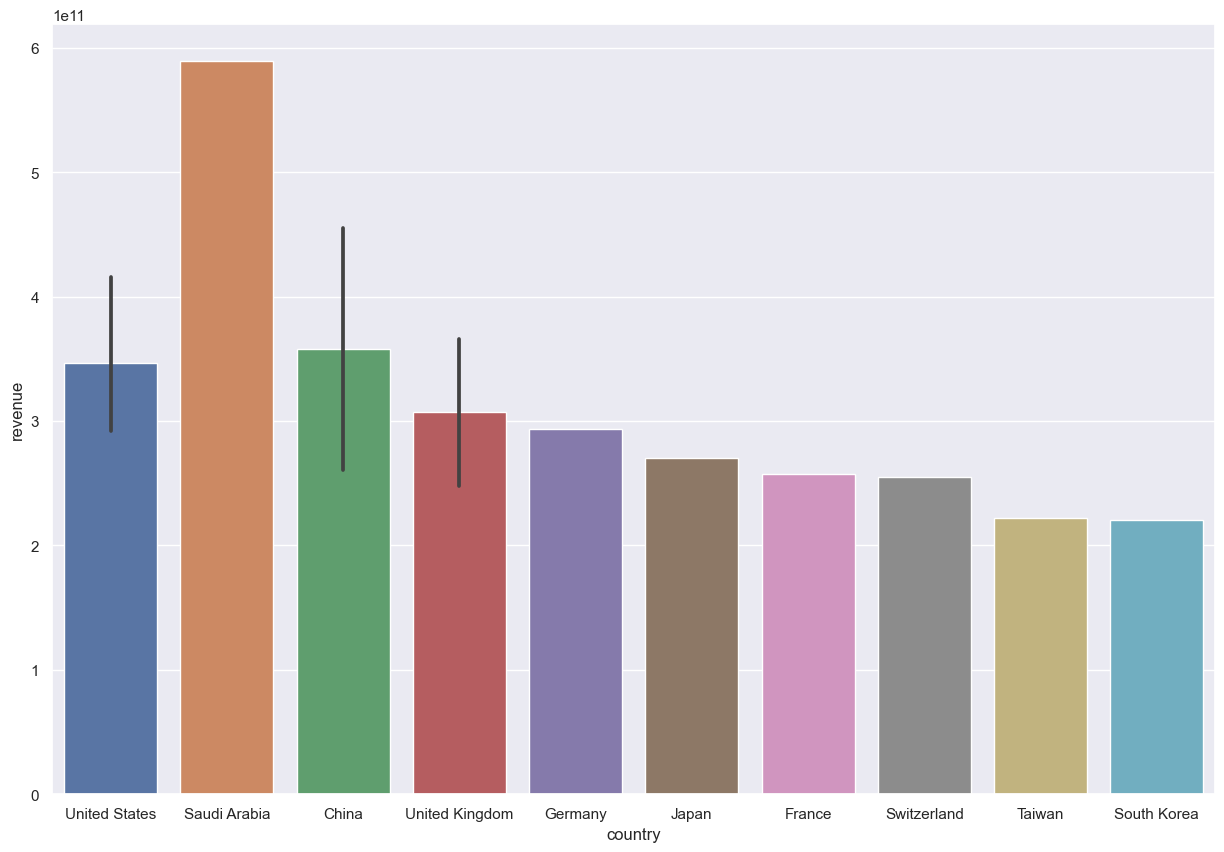

In [22]:
# Top countries by Revenue
plt.figure(figsize=(15,10))
df_sorted = df.sort_values(by="revenue", ascending=False)
top_10_countries = df_sorted.head(25)
sns.barplot(x='country', y='revenue', data=top_10_countries)

**Highest revenue generated by Saudi Arabia then China, USA, UK, Germany and So on.**

<Axes: xlabel='country', ylabel='profits'>

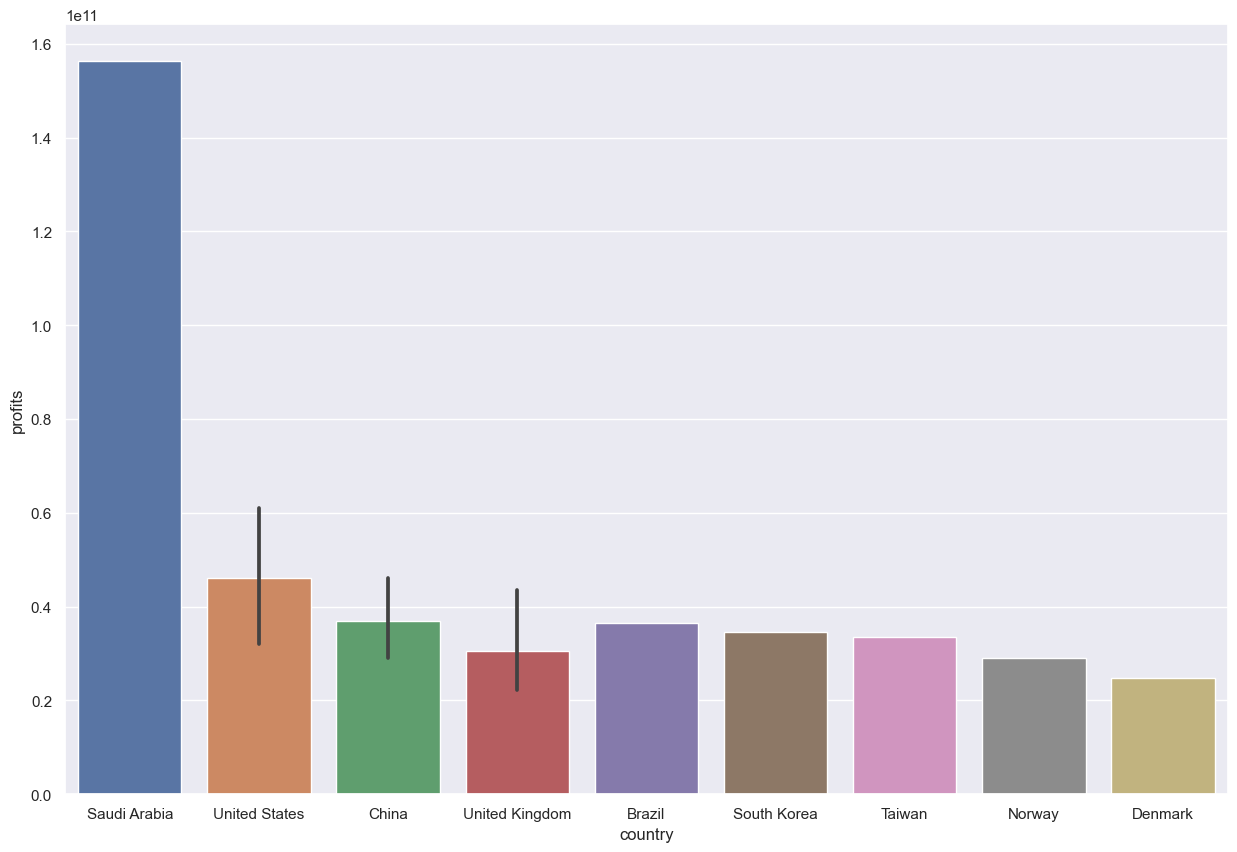

In [23]:
# Top countries by Profit
plt.figure(figsize=(15,10))
df_sorted = df.sort_values(by="profits", ascending=False)
top_10_countries = df_sorted.head(25)
sns.barplot(x='country', y='profits', data=top_10_countries)

**Heighest Profitable country is Saudi Arabia and then others USA, China, UK, etc**

<Axes: xlabel='country', ylabel='assets'>

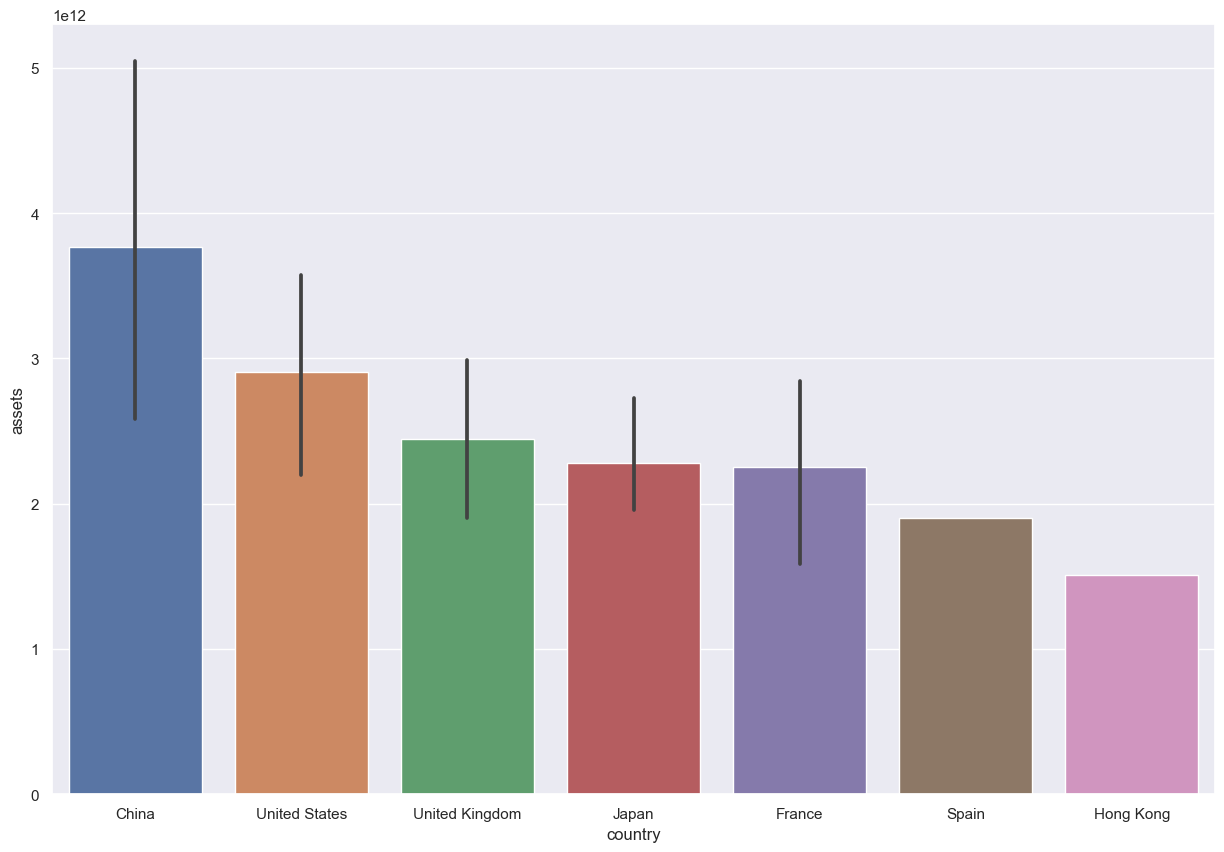

In [24]:
# Top countries by Assests
plt.figure(figsize=(15,10))
df_sorted = df.sort_values(by="assets", ascending=False)
top_10_countries = df_sorted.head(25)
sns.barplot(x='country', y='assets', data=top_10_countries)

**Heighest Assets that country have is Chinat then USA, UK, Japan, etc**

In [25]:
grouped_df = df.groupby(['country', 'organizationName']).agg({'profits': 'sum', 'assets': 'sum', 'revenue': 'sum','marketValue':'sum'}).reset_index()

In [26]:
grouped_df.head()

,country,organizationName,profits,assets,revenue,marketValue
0,Argentina,YPF,2210000000,25910000000,18630000000,9050000000
1,Australia,ANZ,4880000000,744230000000,28270000000,48130000000
2,Australia,Ampol,525000000,9040000000,26510000000,4720000000
3,Australia,Aristocrat Leisure,675000000,6510000000,3970000000,16579999999
4,Australia,BHP Group,19510000000,87820000000,59950000000,150430000000


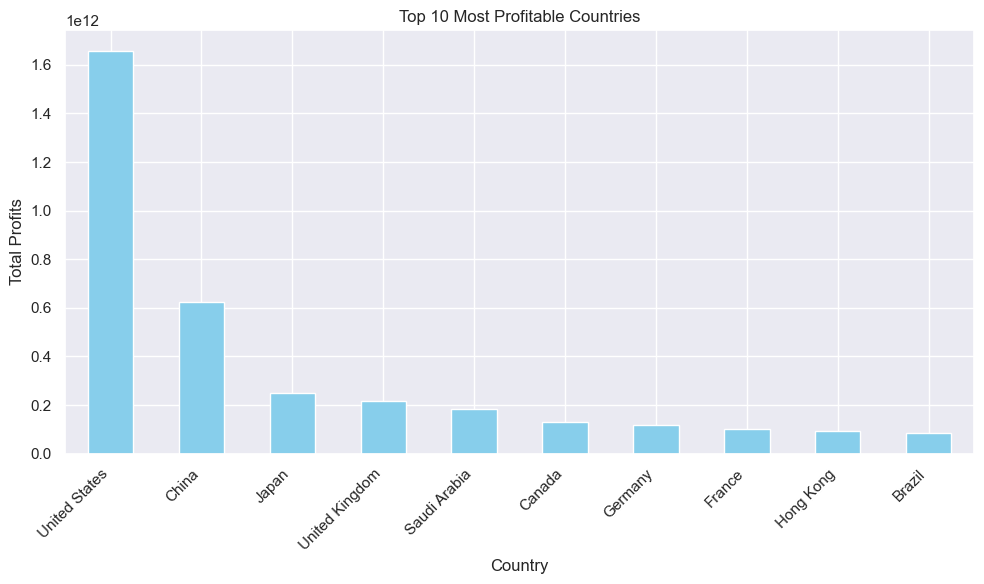

In [27]:
# Grouping by 'country' and summing up 'profits'
country_profits = grouped_df.groupby('country')['profits'].sum()

# Sorting the countries by profits and selecting the top 10
top_10_countries = country_profits.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Profitable Countries')
plt.xlabel('Country')
plt.ylabel('Total Profits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

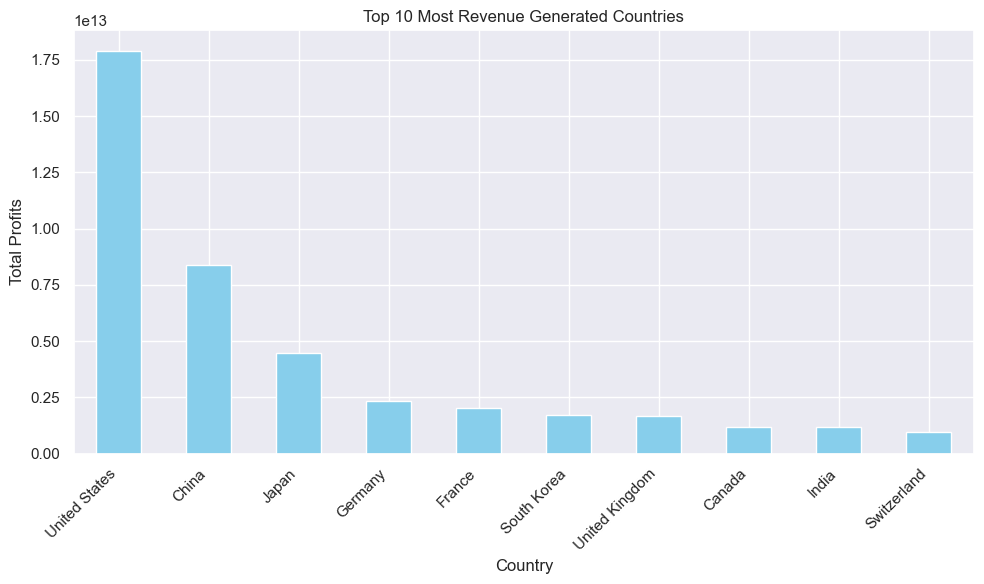

In [28]:
# Grouping by 'country' and summing up 'profits'
country_profits = grouped_df.groupby('country')['revenue'].sum()

# Sorting the countries by profits and selecting the top 10
top_10_countries = country_profits.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Revenue Generated Countries')
plt.xlabel('Country')
plt.ylabel('Total Profits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

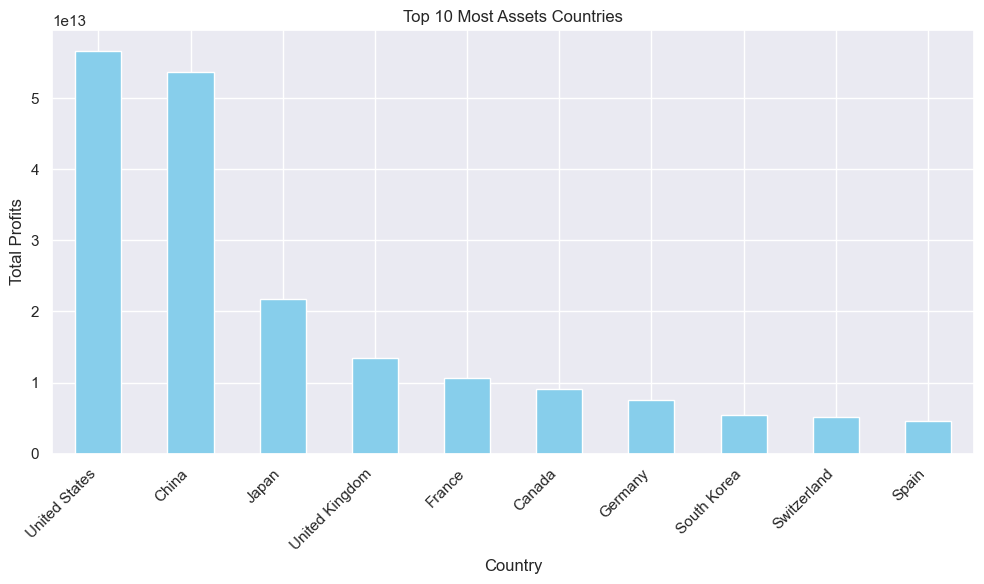

In [29]:
# Grouping by 'country' and summing up 'profits'
country_profits = grouped_df.groupby('country')['assets'].sum()

# Sorting the countries by profits and selecting the top 10
top_10_countries = country_profits.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Assets Countries')
plt.xlabel('Country')
plt.ylabel('Total Profits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

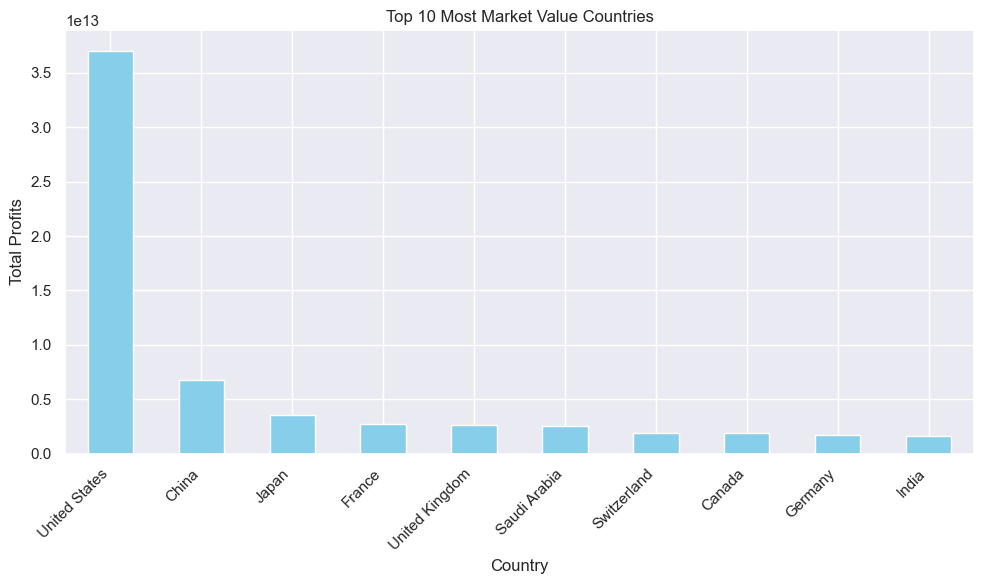

In [30]:
# Grouping by 'country' and summing up 'profits'
country_profits = grouped_df.groupby('country')['marketValue'].sum()

# Sorting the countries by profits and selecting the top 10
top_10_countries = country_profits.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Market Value Countries')
plt.xlabel('Country')
plt.ylabel('Total Profits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From the above graphs it shows that the most Profitable, Revenue, Assets and Market Value has United States.

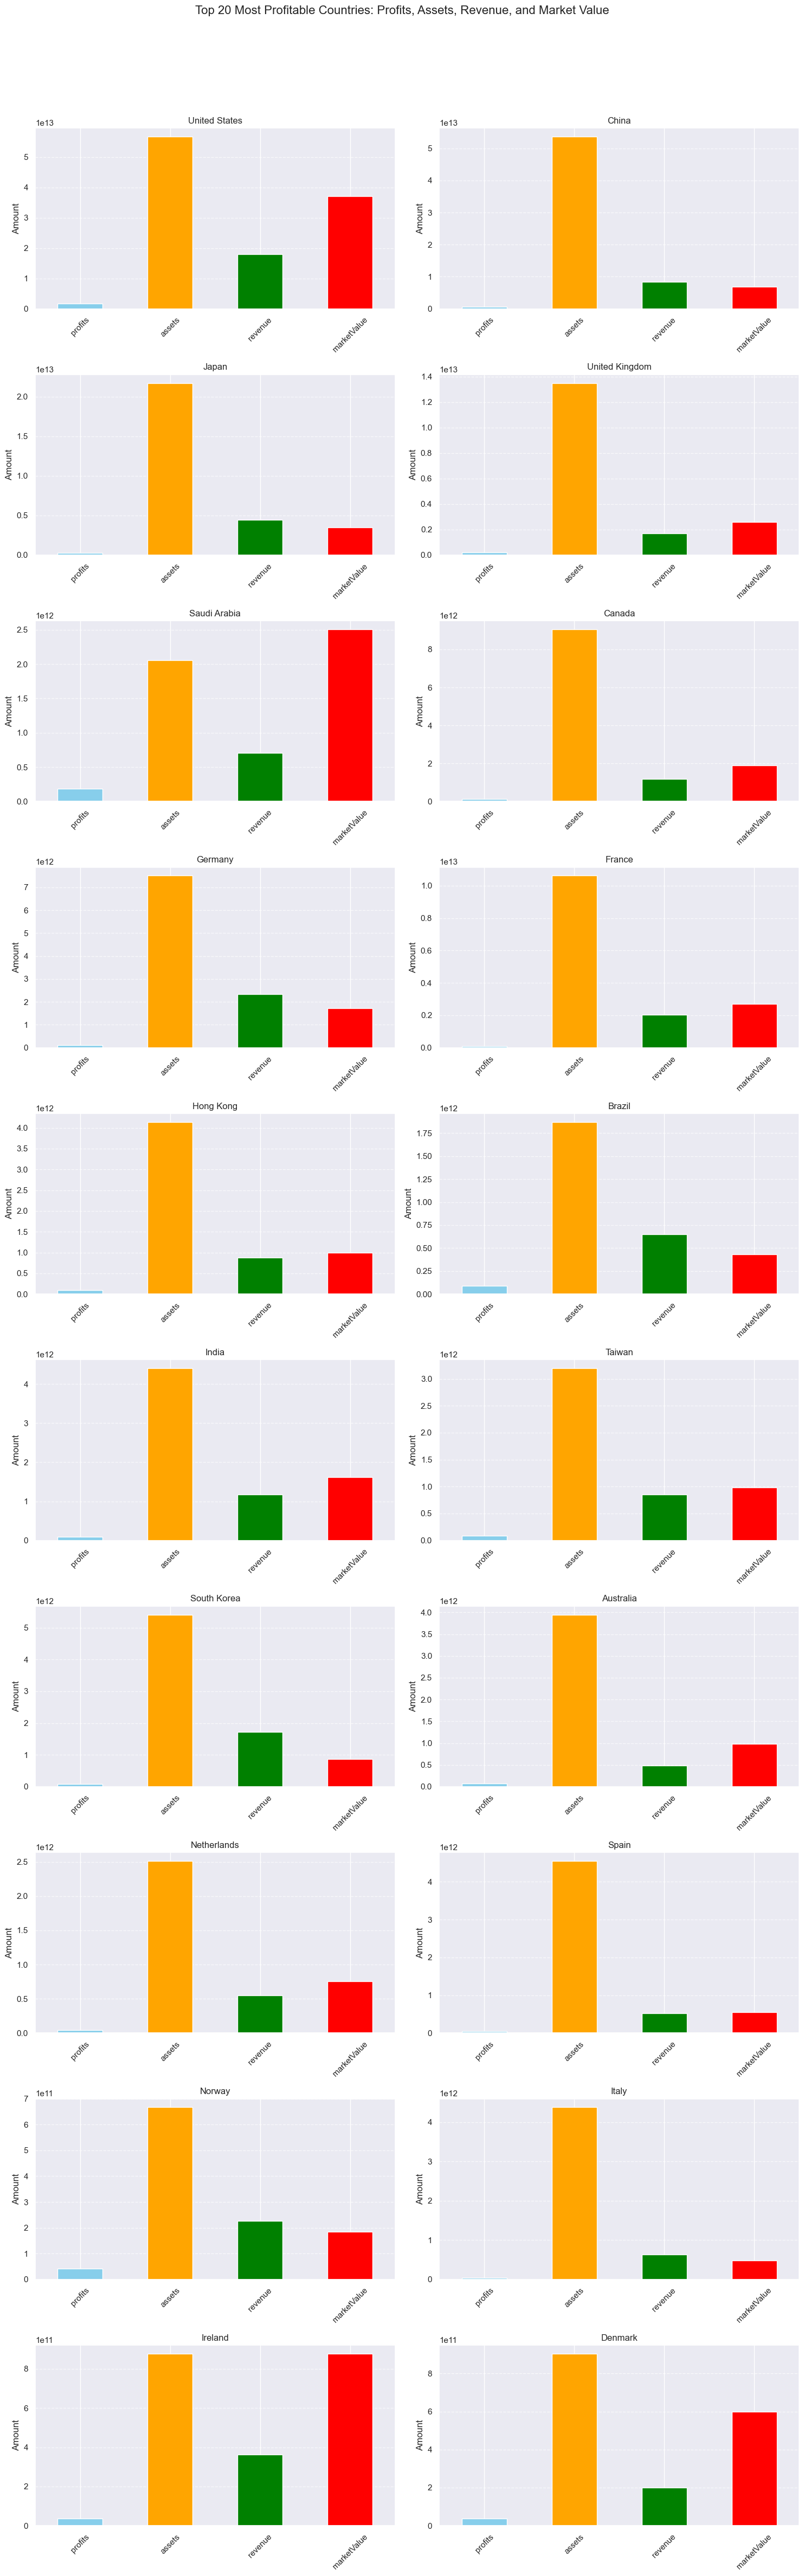

In [31]:
# Grouping by 'country' and aggregating profits, assets, revenue, and market value
country_data = grouped_df.groupby('country').agg({
    'profits': 'sum',
    'assets': 'sum',
    'revenue': 'sum',
    'marketValue': 'sum'
})

# Sorting countries by profits and selecting the top 20
top_20_countries = country_data.sort_values(by='profits', ascending=False).head(20)

# Determine the number of rows and columns for subplots dynamically
num_countries = len(top_20_countries)
num_cols = 2
num_rows = (num_countries + num_cols - 1) // num_cols

# Plotting subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.suptitle('Top 20 Most Profitable Countries: Profits, Assets, Revenue, and Market Value', fontsize=16)

for i, (country, data) in enumerate(top_20_countries.iterrows()):
    row = i // num_cols
    col = i % num_cols
    
    data.plot(kind='bar', ax=axes[row, col], color=['skyblue', 'orange', 'green', 'red'])
    axes[row, col].set_title(country)
    axes[row, col].set_ylabel('Amount')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.7)

# If there are empty subplots, remove them
for i in range(num_countries, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [32]:
df.head()

,rank,organizationName,country,revenue,profits,assets,marketValue
0,1,JPMorgan Chase,United States,179930000000,41800000000,3744300000000,399590000000
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470000000,156360000000,660990000000,2055219999999
2,3,ICBC,China,216770000000,52470000000,6116820000000,203010000000
3,4,China Construction Bank,China,203080000000,48250000000,4977480000000,172990000000
4,5,Agricultural Bank of China,China,186140000000,37920000000,5356860000000,141820000000


### **Top 10 Countries Who have Most Top Companies Who is most Profitable, Generates Good Revenue, Assests and Market Value**

C:\Users\mnzir\AppData\Local\Temp\ipykernel_20772\1717732394.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_orgs = top_10_data.groupby('country').apply(lambda x: x.nlargest(3, metric)).reset_index(drop=True)


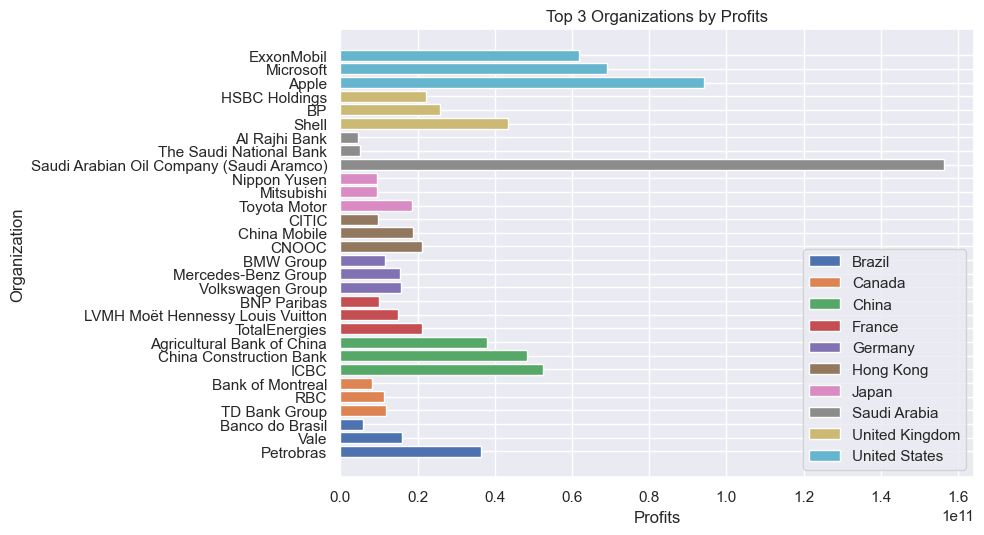

C:\Users\mnzir\AppData\Local\Temp\ipykernel_20772\1717732394.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_orgs = top_10_data.groupby('country').apply(lambda x: x.nlargest(3, metric)).reset_index(drop=True)


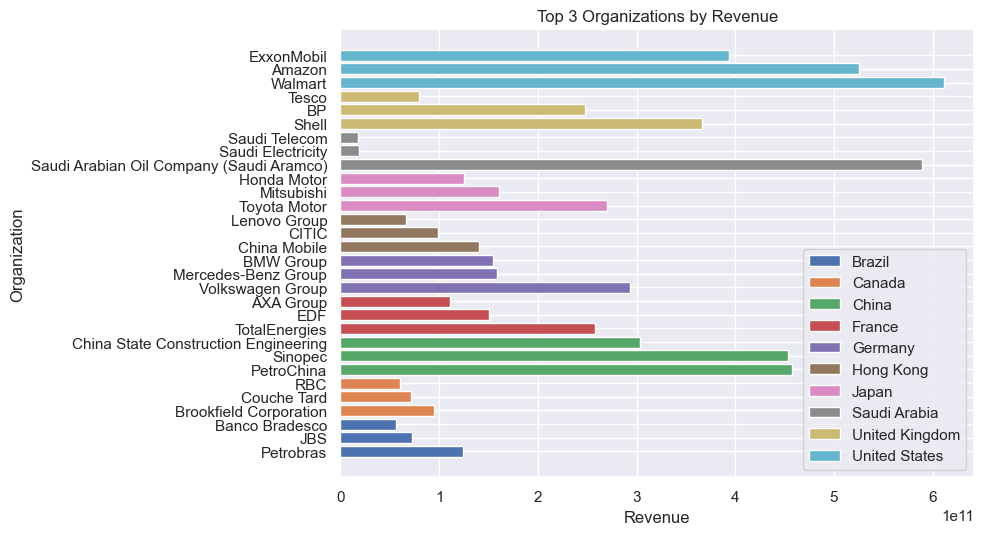

C:\Users\mnzir\AppData\Local\Temp\ipykernel_20772\1717732394.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_orgs = top_10_data.groupby('country').apply(lambda x: x.nlargest(3, metric)).reset_index(drop=True)


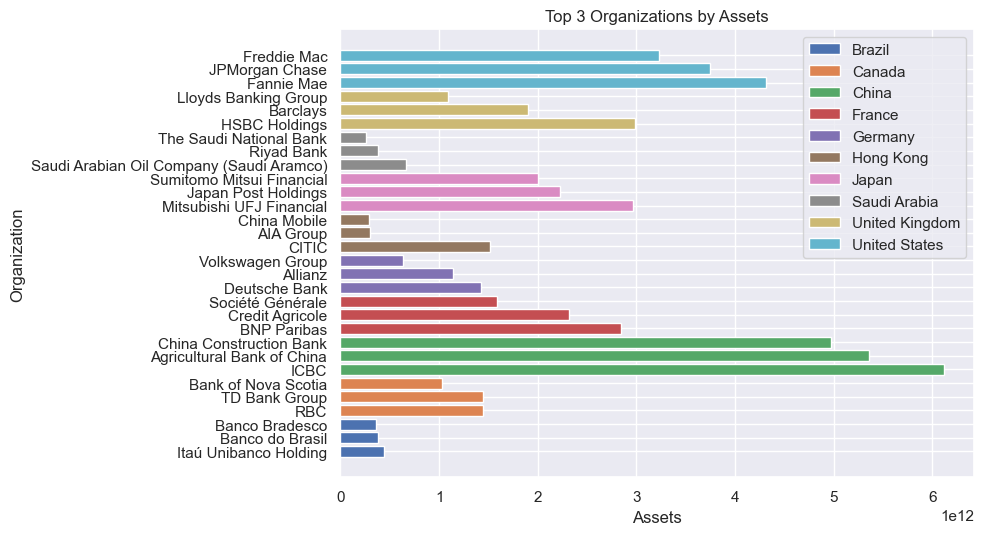

C:\Users\mnzir\AppData\Local\Temp\ipykernel_20772\1717732394.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_orgs = top_10_data.groupby('country').apply(lambda x: x.nlargest(3, metric)).reset_index(drop=True)


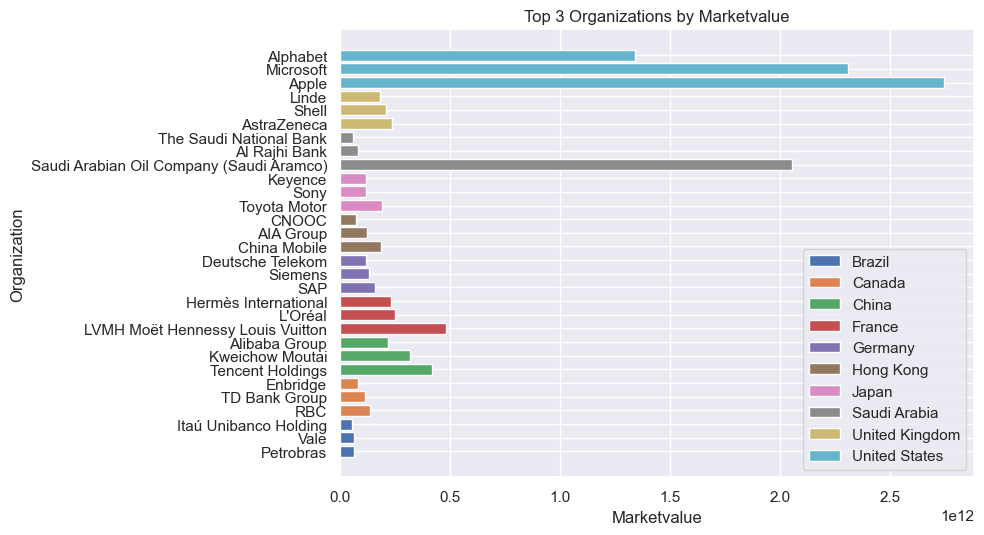

In [35]:
# Get the top 10 countries by sum of each metric
metrics = ['profits', 'revenue', 'assets', 'marketValue']

top_10_countries = grouped_df.groupby('country').sum().nlargest(10, metrics).index

# Plotting subplots for each metric
for metric in metrics:
    # Create a new figure for each metric
    plt.figure(figsize=(10, 6))
    plt.title(f'Top 3 Organizations by {metric.capitalize()}')

    # Filter the DataFrame to include only data from the top 10 countries
    top_10_data = grouped_df[grouped_df['country'].isin(top_10_countries)]
    
    # Group by country and get the top 3 organizations for each metric
    top_3_orgs = top_10_data.groupby('country').apply(lambda x: x.nlargest(3, metric)).reset_index(drop=True)
    
    # Plotting
    for country, data in top_3_orgs.groupby('country'):
        plt.barh(data['organizationName'], data[metric], label=country)

    plt.xlabel(metric.capitalize())
    plt.ylabel('Organization')
    plt.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()


### **Top 10 Countries Who have Top Profits, Revenue, Assets and Mark Value**

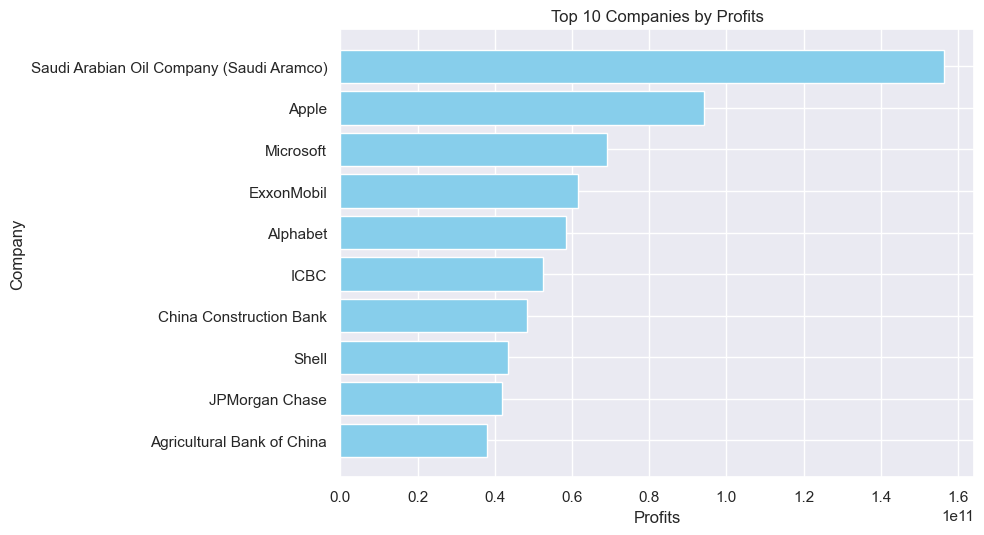

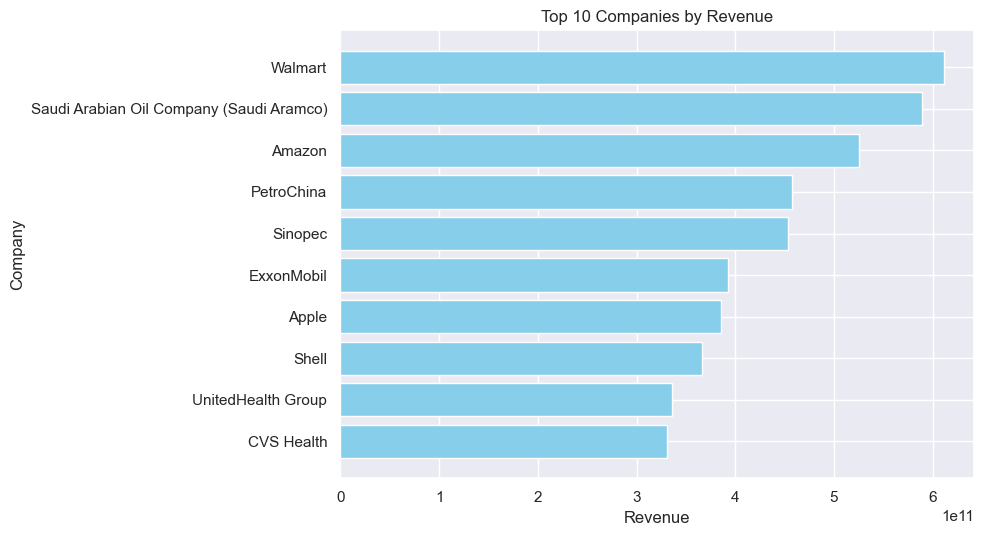

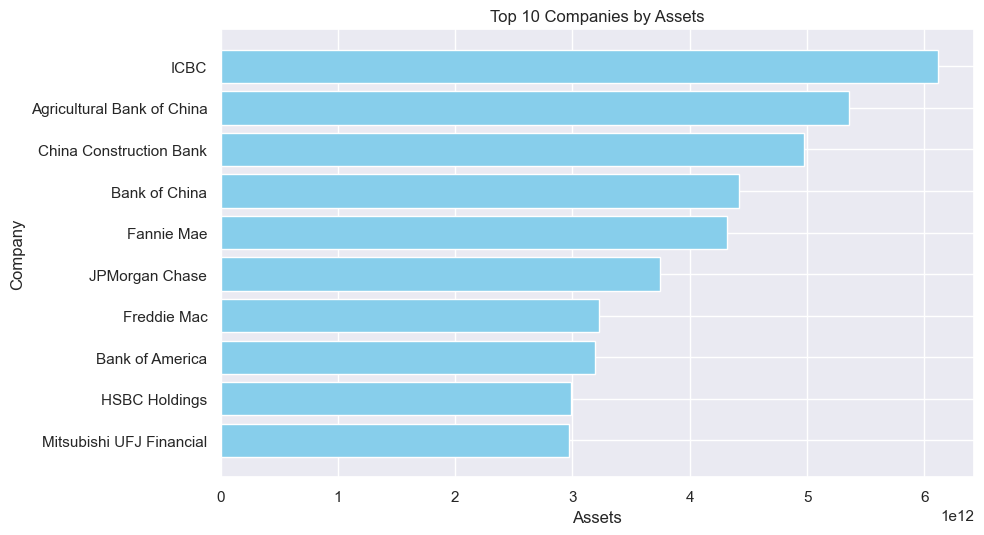

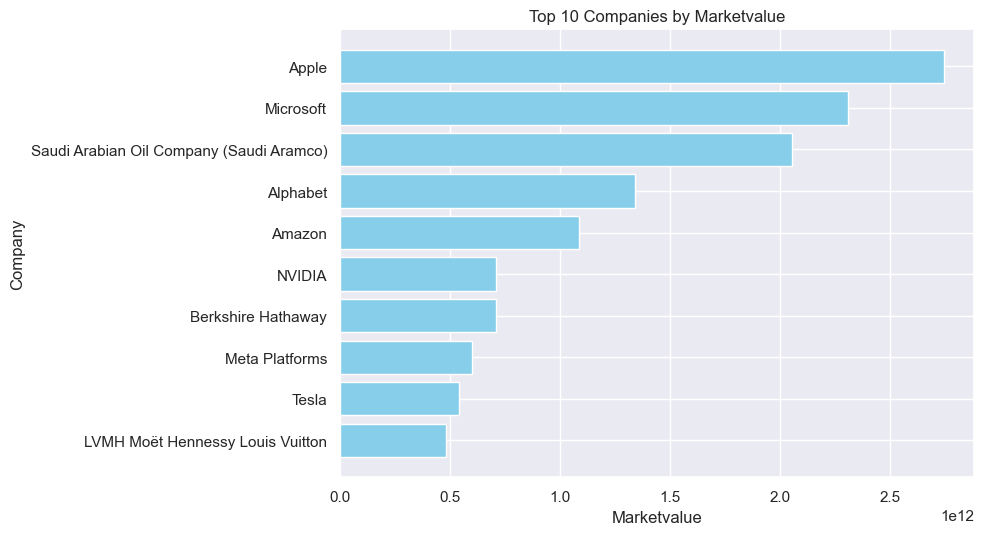

In [34]:
# Define the metrics
metrics = ['profits', 'revenue', 'assets', 'marketValue']

# Plotting subplots for each metric
for metric in metrics:
    # Create a new figure for each metric
    plt.figure(figsize=(10, 6))
    plt.title(f'Top 10 Companies by {metric.capitalize()}')

    # Get the top 10 companies for each metric
    top_10_companies = grouped_df.nlargest(10, metric)
    
    # Plotting
    plt.barh(top_10_companies['organizationName'], top_10_companies[metric], color='skyblue')
    plt.xlabel(metric.capitalize())
    plt.ylabel('Company')
    plt.gca().invert_yaxis()  # Invert y-axis to display the highest value on top
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()